In [3]:
# neat text - simple NLP package for cleaning textual data and text preprocessing.
!pip install neattext
!pip install plotly

# Useful python libraries for to be used in the below file:
import os # library for importing system file paths
import numpy as np # numpy library for further analysis 
import pandas as pd # 
import re #
import matplotlib as plt # for visualisation
import plotly.express as pe # better version of plotly to have better high-level visualisation
import neattext as netxt

     |████████████████████████████████| 27.7 MB 210 kB/s eta 0:00:01    |██▉                             | 2.5 MB 1.2 MB/s eta 0:00:21


In [73]:
# using pandas library to convert the csv file into a dataframe , for further operations
DataSet01 = pd.read_csv('/Users/bhushanbist/Downloads/vaccination_all_tweets.csv')

In [74]:
#For getting the first five rows of the dataset - vaccination_all_tweets.csv 
DataSet01.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [75]:
# Display function used to show the total number of tweets available in the data set
display(DataSet01.shape, str(DataSet01.shape[0])+" Number of tweets available")

(228207, 16)

'228207 Number of tweets available'

In [17]:
#to get further knowledge on the data set  , we use datafram.info to know more about the columns in the dataset
DataSet01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [76]:
# checking for the null values and summing the null values in each columns
DataSet01.isna().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [77]:
# to process further we need to process the dates mentioned in the data set to date format
DataSet01['date'] = pd.to_datetime(DataSet01['date'])

In [80]:
#to get all the unique locatiosn off the dataframe
UniqueLocations = DataSet01.user_location.unique()

# To create a dataframe of all the unique values
AllUniqueLocations = pd.DataFrame(UniqueLocations)
AllUniqueLocations.shape

(25459, 1)

In [81]:
AllUniqueLocations.count() # we have total 25459 locations unique in the current data set 

0    25458
dtype: int64

<AxesSubplot:>

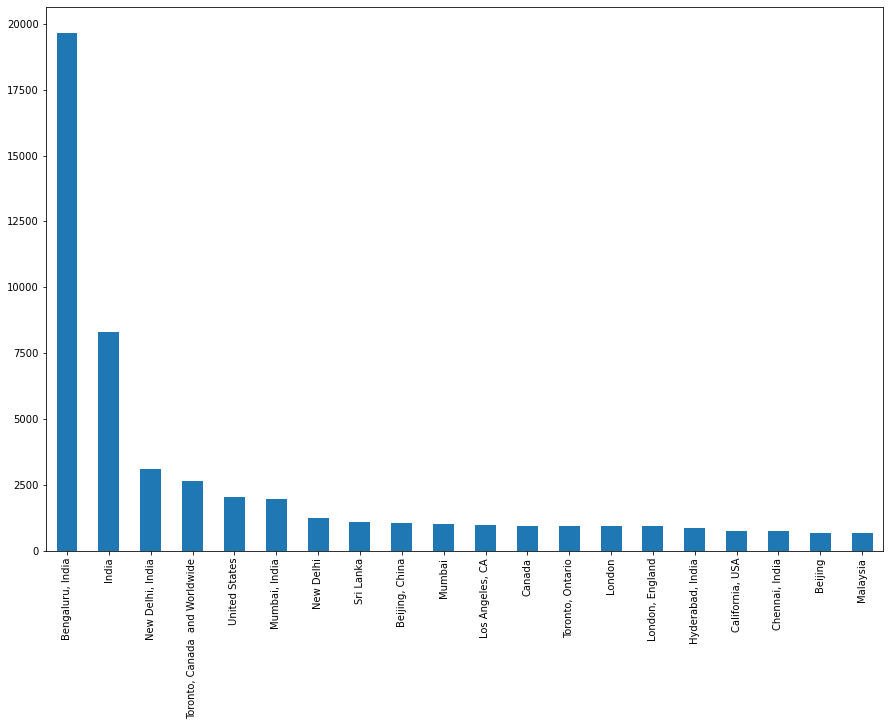

In [82]:
# extracting unique enteries from each region in the data set, total lenth is same as per the above unique locations, 
UserLocationToTweetCount = DataSet01['user_location'].value_counts().nlargest(30)
UserLocationToTweetCount
#plot to show the above data
plt.rcParams["figure.figsize"] = (15,10)
UserLocationToTweetCount.nlargest(20).plot(kind='bar')

In [83]:
# checking for the number of duplicate tweets, shows all duplicate tweets and the count
DataSet01.groupby(['text']).size().reset_index(name='count')
DataSet01['text'].count()

228207

In [84]:
# as seen there are total 226373 duplicate tweets, dropping them for further analysis
DataSet01 = DataSet01.drop_duplicates('text')

In [85]:
DataSet01['text'].count()

226373